## 1. Downloading the dataset.

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_excel('SQL_Task_3_dataset.xlsx')

data.head(5)

,application_id,rep_date,tsag_CreatedOnTime,TSAction,sales_channel,traf_cat_big,traf_cat_small,traf_cat_type,page_reached_CRM,up_stage,mid_stage,page_status,rejection_group,sub_stage,is_completed,is_success,is_approved,is_verificated,is_disbursed,funnel_component
0,1,2022-05-17,2022-05-17 09:11:06.358,20,Mobile,Organic,Google Play,Free,Application Summary,Application Summary,Left on Application Summary,Left page,Not rejected,z\ no data,1,1,1,1,0,1-TR
1,2,2022-05-17,2022-05-17 15:10:07.375,17,Mobile,Contextual,Google Play,Paid,NaN,e-Sign,Disbursed,Completed page,Not rejected,Disbursed,1,1,1,1,1,Disbursed
2,3,2022-05-17,2022-05-17 19:08:06.054,7,Mobile,Affiliate,Cashtap_int,Paid,Bank Verification,NaN,NaN,NaN,Rejected,Exists Active Bank Account,0,0,0,0,0,1-CR
3,4,2022-05-17,2022-05-17 12:52:24.080,7,Mobile,Organic,Vivo store,Free,Bank Verification,Bank Verification,Rejected on Call 1,Left page,Rejected,Active moratorium,1,0,0,0,0,1-AR
4,5,2022-05-17,2022-05-17 23:00:35.315,3,Mobile,Affiliate,HiCredit,Paid,KYC Details,KYC Details,Left on KYC Details,Left page,Not rejected,z\ no data,0,0,0,0,0,1-CR


## 2. Analyzing the Disbursement rate decrease.

*1. Calculating the Disbursement rate for each date.*

In [ ]:
disbursement_rate_df = data.groupby(by=['rep_date']).agg(
    total=('application_id', 'count'),
    total_disbursed=('is_disbursed', 'sum')
)
disbursement_rate_df['disbursement_rate %'] = round(disbursement_rate_df['total_disbursed'] / disbursement_rate_df['total'] * 100, 1)

disbursement_rate_df

,total,total_disbursed,disbursement_rate %
rep_date,,,
2022-05-17,18211,716,3.9
2022-05-18,18541,773,4.2
2022-05-19,16611,558,3.4
2022-05-20,15128,355,2.3
2022-05-21,7834,167,2.1
2022-05-22,6845,137,2.0
2022-05-23,7464,311,4.2
2022-05-24,16341,845,5.2
2022-05-25,14608,684,4.7


There is indeed a decrease in the Disbursement rate from 2022-05-19 to 2022-05-22.

*2. Calculating other conversions.*

In [ ]:
conversion_df = data.groupby(by=['rep_date']).agg(
    total=('application_id', 'count'),
    total_completed=('is_completed', 'sum'),
    total_success=('is_success', 'sum'),
    total_verificated=('is_verificated', 'sum'),
    total_disbursed=('is_disbursed', 'sum')
)
conversion_df['completed_rate %'] = round(conversion_df['total_completed'] / conversion_df['total'] * 100, 1)
conversion_df['success_rate %'] = round(conversion_df['total_success'] / conversion_df['total'] * 100, 1)
conversion_df['verificated_rate %'] = round(conversion_df['total_verificated'] / conversion_df['total'] * 100, 1)
conversion_df['disbursed_rate %'] = round(conversion_df['total_disbursed'] / conversion_df['total'] * 100, 1)

conversion_df[[
    'completed_rate %',
    'success_rate %',
    'verificated_rate %',
    'disbursed_rate %'
]]

,completed_rate %,success_rate %,verificated_rate %,disbursed_rate %
rep_date,,,,
2022-05-17,70.6,57.2,16.7,3.9
2022-05-18,70.2,57.9,16.6,4.2
2022-05-19,64.6,51.6,14.4,3.4
2022-05-20,26.8,23.8,5.8,2.3
2022-05-21,29.7,26.5,5.8,2.1
2022-05-22,34.0,30.8,6.3,2.0
2022-05-23,71.7,60.5,16.0,4.2
2022-05-24,73.1,58.5,14.1,5.2
2022-05-25,70.8,54.2,13.2,4.7


There is the same pattern in the decrease in the Completion rate (the proportion of completed applications to all applications) so let's investigate the completion of applications or "mid_stage" column which describes why the application was not completed.

*3. Analyzing the "mid_stage" column.*

For each date and for each possible reason in "mid_stage" column let's calculate the proportion of applications not completed for this reason to all applications on that date.

In [ ]:
mid_stage_dict = {}

dates = list(data['rep_date'].unique())
reasons = sorted(list(data['mid_stage'].dropna().unique()))

for date in dates:
    mid_stage_dict[date] = []
    total = len(data[data['rep_date'] == date])
    for reason in reasons:
        total_reason = len(data[np.logical_and(
            data['rep_date'] == date,
            data['mid_stage'] == reason
        )])
        mid_stage_dict[date].append(round(total_reason / total * 100, 1))

mid_stage_df = pd.DataFrame(mid_stage_dict, index=reasons)
mid_stage_df.transpose()

,Disbursed,Left on Application Summary,Left on Bank Verification,Left on KYC Details,Left on Personal Details,Left on e-Nach,Left on e-Sign,Rejected on CRM deduplication,Rejected on Call 1,Rejected on Call 10,Rejected on Call 2,Rejected on Call 3
2022-05-17,3.9,1.9,4.0,23.6,5.5,3.1,0.1,6.6,6.7,7.6,6.5,30.0
2022-05-18,4.2,2.1,4.5,23.8,5.7,3.1,0.1,6.1,6.2,7.1,6.6,30.2
2022-05-19,3.4,1.8,3.3,20.3,15.0,3.0,0.0,7.2,5.7,6.2,5.6,28.3
2022-05-20,2.3,1.0,1.3,4.8,68.3,1.9,0.0,2.7,0.3,0.6,2.1,14.6
2022-05-21,2.1,0.8,1.2,4.2,66.1,2.0,0.1,2.8,0.3,0.9,2.4,17.1
2022-05-22,2.0,1.2,1.2,5.0,61.0,1.8,0.0,2.9,0.2,1.3,2.4,20.9
2022-05-23,4.2,1.8,2.4,12.0,16.3,3.4,0.2,7.2,4.0,6.4,5.1,37.0
2022-05-24,5.2,3.4,2.7,22.3,4.6,5.0,0.0,7.6,6.9,0.5,6.1,35.6
2022-05-25,4.7,3.2,2.7,24.1,5.1,5.0,0.1,9.1,7.5,0.1,6.9,31.5


The changes in "Left on Personal Details" seem to be the most significant. In addition the reason "Left on Personal Details" intuitively seems to be the very first possible reason of incomplete application and, most importantly, is indeed the only reason ("mid_stage") of incomplete 1-st stage ("up_stage") "Personal Details".

In [ ]:
data[data['up_stage'] == 'Personal Details']['mid_stage'].unique()

array(['Left on Personal Details'], dtype=object)

*4. Conclusions.*

So, something was happening from May 19-th to May 22-nd which made the clients leave their applications already on Personal Details stage. Then the Completion rate dropped and so the Disbursement rate dropped as well. Maybe there were some technical problems with the system but this is only a guess.

## 3. Creating charts.

In [ ]:
import matplotlib.pyplot as plt

*1. A chart with the Disbursement rate (line) and the number of applications (columns) dynamically by days.*

In [ ]:
disbursement_rate_df = data.groupby(by=['rep_date']).agg(
    total=('application_id', 'count'),
    total_disbursed=('is_disbursed', 'sum')
)
disbursement_rate_df['disbursement_rate %'] = round(disbursement_rate_df['total_disbursed'] / disbursement_rate_df['total'] * 100, 2)

disbursement_rate_df[[
    'total',
    'disbursement_rate %'
]]

,total,disbursement_rate %
rep_date,,
2022-05-17,18211,3.93
2022-05-18,18541,4.17
2022-05-19,16611,3.36
2022-05-20,15128,2.35
2022-05-21,7834,2.13
2022-05-22,6845,2.00
2022-05-23,7464,4.17
2022-05-24,16341,5.17
2022-05-25,14608,4.68


In [ ]:
days = list(range(17, 26))
total = list(disbursement_rate_df['total'].values)
disbursement_rate = list(disbursement_rate_df['disbursement_rate %'].values)

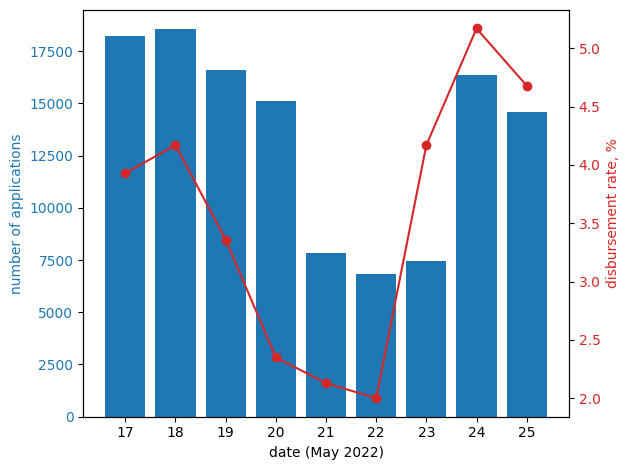

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('date (May 2022)')
ax1.set_xticks(days)
ax1.set_ylabel('number of applications', color=color)
ax1.bar(days, total, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('disbursement rate, %', color=color)
ax2.plot(days, disbursement_rate, '-o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

*2. A table by days in the breakdown of "up_stage", "mid_stage", "sub_stage" as a percentage of 100% of applications.*

First let's make a template of a future table.

In [ ]:
up_stage_list = [
    'Personal Details',
    'KYC Details',
    'Bank Verification',
    'Application Summary',
    'e-Nach',
    'e-Sign'
]

mid_stage_list = {}
for stage in up_stage_list:
    mid_stage_list[stage] = sorted(list(data[
        data['up_stage'] == stage
    ][
        'mid_stage'
    ].dropna().unique()))

sub_stage_list = {}
for stage_1 in mid_stage_list:
    for stage_2 in mid_stage_list[stage_1]:
        sub_stage_list[(stage_1, stage_2)] = sorted(list(data[np.logical_and(
            data['up_stage'] == stage_1,
            data['mid_stage'] == stage_2
        )][
            'sub_stage'
        ].dropna().unique()))

final_combinations = []
for stage_1 in up_stage_list:
    final_combinations.append([stage_1, '', ''])
    for stage_2 in mid_stage_list[stage_1]:
        final_combinations.append([stage_1, stage_2, ''])
        for stage_3 in sub_stage_list[(stage_1, stage_2)]:
            final_combinations.append([stage_1, stage_2, stage_3])

final_combinations_T = np.transpose(np.asarray(final_combinations))
up_stage_indexes = list(final_combinations_T[0])
mid_stage_indexes = list(final_combinations_T[1])
sub_stage_indexes = list(final_combinations_T[2])

test_list = ['100,00%'] * len(up_stage_indexes)
table = pd.DataFrame({
    'up_stage': up_stage_indexes,
    'mid_stage': mid_stage_indexes,
    'sub_stage': sub_stage_indexes,
    'value': test_list
}).set_index(['up_stage', 'mid_stage', 'sub_stage'])

table

value
up_stage            mid_stage                     sub_stage                                                  
Personal Details                                                                                      100,00%
                    Left on Personal Details                                                          100,00%
                                                  z\ no data                                          100,00%
KYC Details                                                                                           100,00%
                    Left on KYC Details                                                               100,00%
                                                  z\ no data                                          100,00%
                    Rejected on CRM deduplication                                                     100,00%
                                                  Rejected (no reason in CRM)                         100,00%
                                                  Rejected. Exists active agreement                   100,00%
                                                  Rejected. Partial data match (ID/Moblie) with o...  100,00%
                                                  z\ Error: no CRM deduplication                      100,00%
Bank Verification                                                                                     100,00%
                    Left on Bank Verification                                                         100,00%
                                                  Bad reference found                                 100,00%
                                                  New customer rejection due to age                   100,00%
                                                  Rejection due to primary number of accounts         100,00%
                                                  Scoring Model Reject                                100,00%
                                                  z\ no data                                          100,00%
                    Rejected on Call 1                                                                100,00%
                                                  Active moratorium                                   100,00%
                                                  Blacklisted Email address                           100,00%
                                                  Multiple rejections in last 30 days                 100,00%
                                                  Multiple rejections in last 90 days                 100,00%
                                                  z\ Error: Unknown                                   100,00%
                    Rejected on Call 2                                                                100,00%
                                                  Bad reference found                                 100,00%
                                                  New customer rejection due to age                   100,00%
                                                  Rejection due to product parameters                 100,00%
                                                  z\ Error: Unknown                                   100,00%
                    Rejected on Call 3                                                                100,00%
                                                  Multiple KYC's evidenced via Credit Bureau          100,00%
                                                  Rejection due to Bureau Ping Error                  100,00%
                                                  Rejection due to primary number of accounts         100,00%
                                                  Rejection due to primary overdue accounts           100,00%
                                                  Rejection due to unsecure overdue amount            100,00%
                                  

Now we add dates and get the final table. The following cell needs about 15 seconds to be completed. There may be some very small inaccuracies in the percentages since there are some NULL values in columns "up_stage", "mid_stage", "sub_stage".

In [ ]:
dates = list(data['rep_date'].unique())
for date in dates:
    date_column = []
    total = len(data[data['rep_date'] == date])
    for combination in final_combinations:
        stage_1, stage_2, stage_3 = combination
        if (stage_2, stage_3) == ('', ''):
            tmp_total = len(data[np.logical_and(
                data['rep_date'] == date,
                data['up_stage'] == stage_1
            )])
        elif stage_3 == '':
            tmp_total = len(data[np.logical_and(
                data['rep_date'] == date,
                np.logical_and(
                    data['up_stage'] == stage_1,
                    data['mid_stage'] == stage_2
                )
            )])
        else:
            tmp_total = len(data[np.logical_and(
                np.logical_and(
                    data['rep_date'] == date,
                    data['up_stage'] == stage_1
                ), np.logical_and(
                    data['mid_stage'] == stage_2,
                    data['sub_stage'] == stage_3
                )
            )])
        date_column.append(f'{round(tmp_total / total * 100, 2)}%')
    table[str(pd.to_datetime(str(date)).date())] = date_column

date_column = []
total = len(data)
for combination in final_combinations:
    stage_1, stage_2, stage_3 = combination
    if (stage_2, stage_3) == ('', ''):
        tmp_total = len(data[
            data['up_stage'] == stage_1
        ])
    elif stage_3 == '':
        tmp_total = len(data[np.logical_and(
            data['up_stage'] == stage_1,
            data['mid_stage'] == stage_2
        )])
    else:
        tmp_total = len(data[np.logical_and(
            data['up_stage'] == stage_1,
            np.logical_and(
                data['mid_stage'] == stage_2,
                data['sub_stage'] == stage_3
            )
        )])
    date_column.append(f'{round(tmp_total / total * 100, 2)}%')
table['total'] = date_column

table = table.drop(columns=['value'])
table

2022-05-17  \
up_stage            mid_stage                     sub_stage                                                       
Personal Details                                                                                          5.52%   
                    Left on Personal Details                                                              5.52%   
                                                  z\ no data                                              5.52%   
KYC Details                                                                                              30.28%   
                    Left on KYC Details                                                                  23.63%   
                                                  z\ no data                                             23.63%   
                    Rejected on CRM deduplication                                                         6.65%   
                                                  Rejected (no reason in CRM)                              0.1%   
                                                  Rejected. Exists active agreement                       0.34%   
                                                  Rejected. Partial data match (ID/Moblie) with o...      6.04%   
                                                  z\ Error: no CRM deduplication                          0.17%   
Bank Verification                                                                                        47.24%   
                    Left on Bank Verification                                                             4.03%   
                                                  Bad reference found                                      0.0%   
                                                  New customer rejection due to age                        0.0%   
                                                  Rejection due to primary number of accounts              0.0%   
                                                  Scoring Model Reject                                    0.01%   
                                                  z\ no data                                              4.03%   
                    Rejected on Call 1                                                                    6.73%   
                                                  Active moratorium                                       6.44%   
                                                  Blacklisted Email address                               0.26%   
                                                  Multiple rejections in last 30 days                     0.02%   
                                                  Multiple rejections in last 90 days                     0.01%   
                                                  z\ Error: Unknown                                       0.01%   
                    Rejected on Call 2                                                                    6.52%   
                                                  Bad reference found                                     0.49%   
                                                  New customer rejection due to age                        5.7%   
                                                  Rejection due to product parameters                     0.32%   
                                                  z\ Error: Unknown                                       0.01%   
                    Rejected on Call 3                                                                   29.96%   
                                                  Multiple KYC's evidenced via Credit Bureau              0.04%   
                                                  Rejection due to Bureau Ping Error                      0.02%   
                                                  Rejection due to primary number of accounts             4.96%   
                                                  Rejection due to primary o

In [ ]:
table.to_excel('Task_3_B_table.xlsx')